In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot
import json
import rasterio
from rasterio import merge
from rasterio import mask

In [3]:
#dataset = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/MUL-PanSharpen/MUL-PanSharpen_AOI_2_Vegas_img1265.tif")
dataset1 = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1265.tif")
dataset2 = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1385.tif")
dataset30 = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img30.tif")

In [4]:
with open("spacenet_sample/AOI_2_Vegas_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img30.geojson", 'r') as f:
        shapes30 = json.load(f)

In [69]:
merged = rasterio.merge.merge([dataset1, dataset2])

In [79]:
merged[0][1].shape

(4550, 1950)

In [78]:
newdataset = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/merged2.tif", 'w', driver='GTiff',
...                             height=merged[0].shape[1], width=merged[0].shape[2],
...                             count=3, dtype=dataset2.dtypes[0],
...                             crs=dataset2.crs, transform=merged[1])

In [82]:
newdataset.write(merged[0][0], 1)
newdataset.write(merged[0][1], 2)
newdataset.write(merged[0][2], 3)

In [83]:
newdataset.close()

In [84]:
dataset = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/merged2.tif")

In [5]:
shapes30

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'bridge_typ': '2',
    'heading': '0',
    'lane_numbe': '2',
    'lane_number': '2',
    'one_way_ty': '2',
    'paved': '1',
    'road_id': 3074,
    'road_type': '5',
    'origarea': 0,
    'origlen': 0.0005332139422457522,
    'partialDec': 1,
    'truncated': 0},
   'geometry': {'type': 'LineString',
    'coordinates': [[-115.30220025046, 36.13036637891],
     [-115.30218997786, 36.12983326393]]}},
  {'type': 'Feature',
   'properties': {'bridge_typ': '2',
    'heading': '0',
    'lane_numbe': '2',
    'lane_number': '2',
    'one_way_ty': '2',
    'paved': '1',
    'road_id': 2310,
    'road_type': '5',
    'origarea': 0,
    'origlen': 0.0009003597183482555,
    'partialDec': 1,
    'truncated': 0},
   'geometry': {'type': 'LineString',
    'coordinates': [[-115.3004976, 36.13036253060634],
     [-115.30128620367, 

In [252]:
shapes30['features']

[{'type': 'Feature',
  'properties': {'bridge_typ': '2',
   'heading': '0',
   'lane_numbe': '2',
   'lane_number': '2',
   'one_way_ty': '2',
   'paved': '1',
   'road_id': 3074,
   'road_type': '5',
   'origarea': 0,
   'origlen': 0.0005332139422457522,
   'partialDec': 1,
   'truncated': 0},
  'geometry': {'type': 'LineString',
   'coordinates': [[-115.30220025046, 36.13036637891],
    [-115.30218997786, 36.12983326393]]}},
 {'type': 'Feature',
  'properties': {'bridge_typ': '2',
   'heading': '0',
   'lane_numbe': '2',
   'lane_number': '2',
   'one_way_ty': '2',
   'paved': '1',
   'road_id': 2310,
   'road_type': '5',
   'origarea': 0,
   'origlen': 0.0009003597183482555,
   'partialDec': 1,
   'truncated': 0},
  'geometry': {'type': 'LineString',
   'coordinates': [[-115.3004976, 36.13036253060634],
    [-115.30128620367, 36.13035953211]]}},
 {'type': 'Feature',
  'properties': {'bridge_typ': '2',
   'heading': '0',
   'lane_numbe': '2',
   'lane_number': '2',
   'one_way_ty': '

In [126]:
shapes30fixed = [shape['geometry'] for shape in shapes30['features']]

In [183]:
#img30 = rasterio.mask.mask(dataset30, shapes30fixed)[0].transpose(1,2,0)

In [299]:
shapes30fixedTEST = shapes30fixed[1:2]

In [302]:
shapes30fixedTEST

[{'type': 'LineString',
  'coordinates': [[-115.3004976, 36.13036253060634],
   [-115.30128620367, 36.13035953211]]}]

In [298]:
shapes30fixedTEST

[{'type': 'LineString',
  'coordinates': [[-115.30220025046, 36.13036637891],
   [-115.30218997786, 36.12983326393]]},
 {'type': 'LineString',
  'coordinates': [[-115.3004976, 36.13036253060634],
   [-115.30128620367, 36.13035953211]]}]

In [304]:
[-115.30220025046+115.30218997786,36.13036637891-36.12983326393]

[-1.0272600007965593e-05, 0.0005331149799943091]

In [310]:
c1 =np.array([[-115.30220025046, 36.13036637891],
   [-115.30218997786, 36.12983326393]])
c2 =np.array([[-115.3004976, 36.13036253060634],
   [-115.30128620367, 36.13035953211]])

In [313]:
np.dot(c1[1] - c1[0],c1[1] - c1[0])

2.843171082052563e-07

In [314]:
np.dot(c2[1] - c2[0],c2[1] - c2[0])

6.21904739322332e-07

In [319]:
c2[0]

array([-115.3004976 ,   36.13036253])

In [323]:
rasterio.transform.rowcol(dataset30.transform, c2[0][0],c2[0][1])

(535, 1300)

In [321]:
rasterio.transform.rowcol(dataset30.transform, c2[1][0],c2[1][1])

(536, 1007)

In [324]:
rasterio.transform.rowcol(dataset30.transform, c1[0][0],c1[0][1])

(533, 669)

In [325]:
rasterio.transform.rowcol(dataset30.transform, c1[1][0],c1[1][1])

(731, 673)

In [ ]:
rasterio.transform

In [371]:
shapes30fixed = [shape['geometry'] for shape in shapes30['features']]
imgAdd = rasterio.features.rasterize(shapes30fixed, transform = dataset30.transform,
                                     out_shape = (1300, 1300), default_value = 1.0, fill = 0, all_touched = True)

In [372]:
imgAdd = np.array([imgAdd, imgAdd*0, imgAdd*0]).transpose(1,2,0)

In [365]:
imgAdd1 = imgAdd * 0

In [370]:
imgAdd.shape

(1300, 1300, 3)

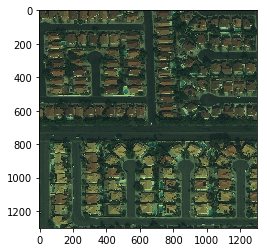

In [381]:
pyplot.imshow(dataset30.read().transpose(1,2,0) / 2048.)

In [ ]:
pyplot.imshow(imgAdd)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


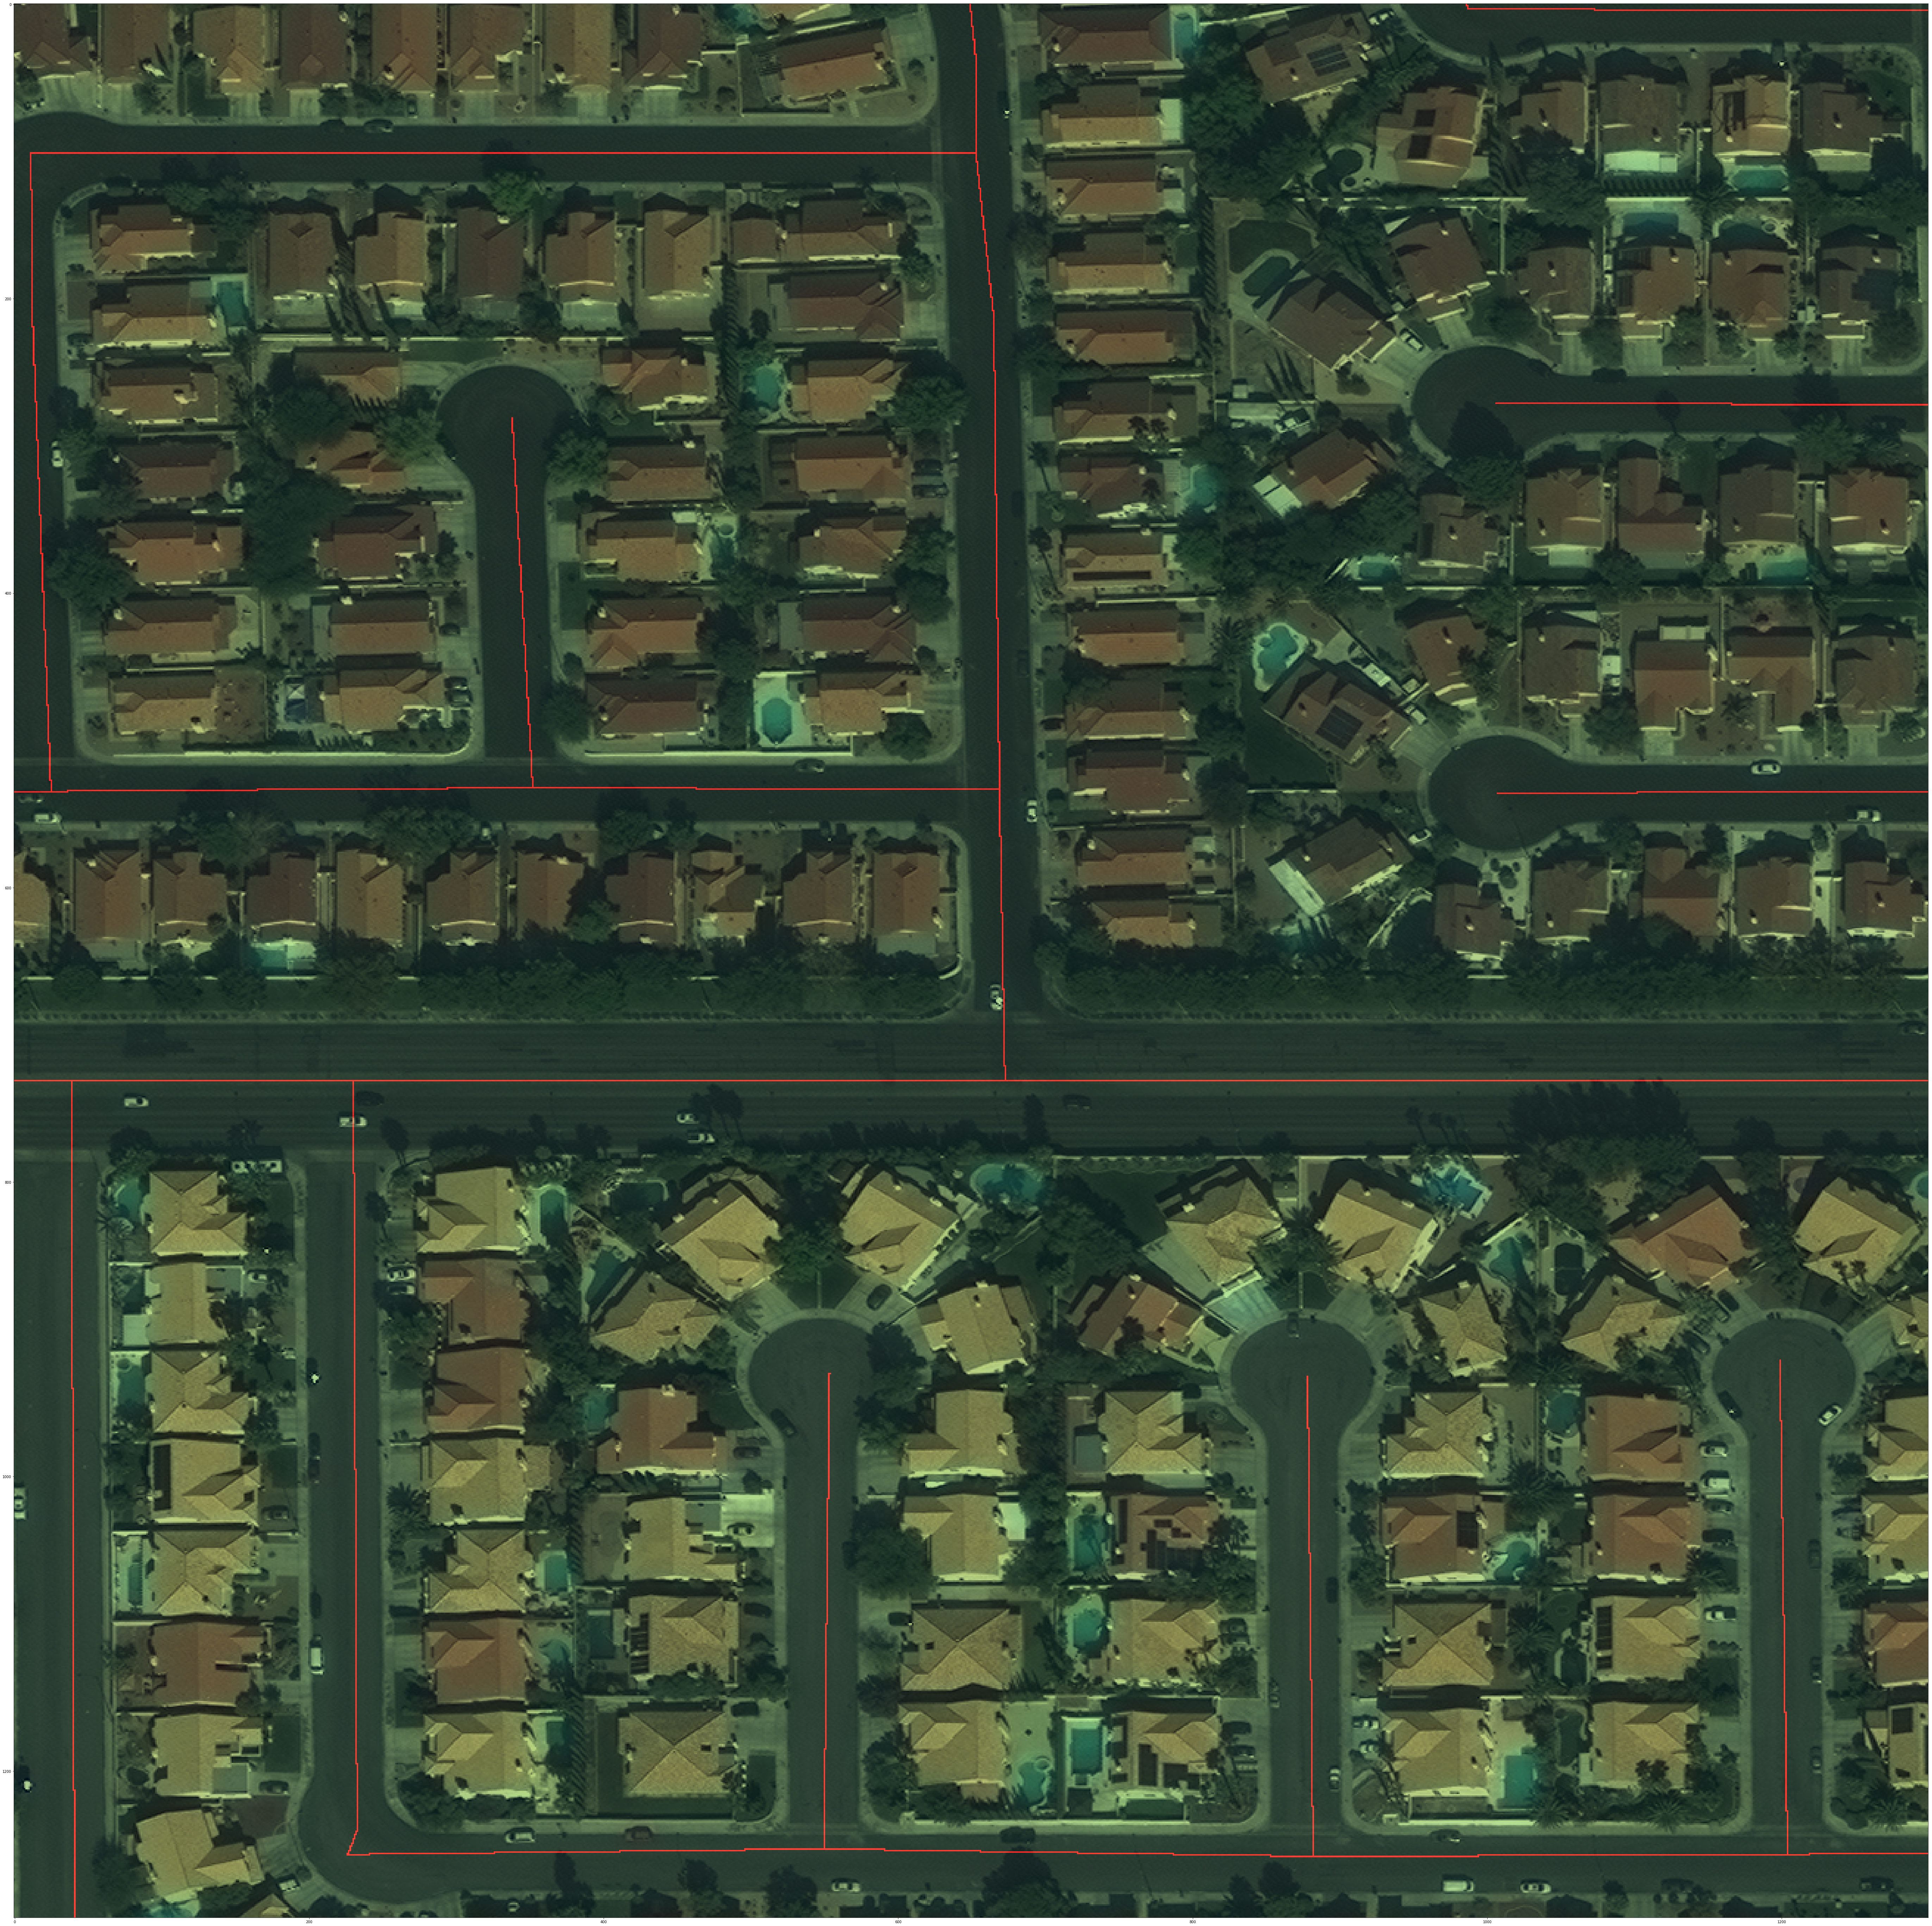

In [397]:
pyplot.imshow(imgAdd + dataset30.read().transpose(1,2,0) / 2048.)

In [387]:
pyplot.imsave("testimg.png", imgAdd + dataset30.read().transpose(1,2,0) / 2048.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [343]:
pyplot.show()

In [1]:
matplotlib.rcParams['figure.figsize'] = [12, 12]

NameError: name 'matplotlib' is not defined

In [10]:
from rasterio import transform

In [11]:
from rasterio import Affine as A

In [13]:
A.rotation(0)

Affine(1.0, -0.0, 0.0,
       0.0, 1.0, 0.0)

In [395]:
import matplotlib
from matplotlib import pyplot

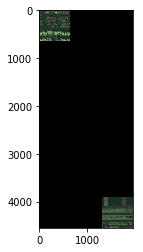

In [68]:
pyplot.imshow(newdataset[0].transpose(1,2,0)/2048)

In [90]:
dataset1 = rasterio.open("spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1265.tif")

5852

In [87]:
pic1 = dataset.read().transpose(1,2,0)

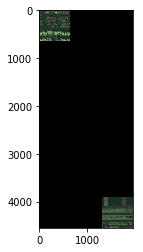

In [88]:
pyplot.imshow(pic1/2048)

In [18]:
dataset.transform * A.rotation(10)

Affine(2.658980933137261e-06, -4.6885007970146995e-07, -115.2724176,
       -4.68850106417051e-07, -2.65898108464885e-06, 36.1897226999)

In [19]:
dataset1 = dataset

In [29]:
import numpy as np

In [37]:
dest = np.zeros(dataset.shape, np.uint16)

In [24]:
from rasterio.warp import reproject

In [51]:
reproject(band1, dest, src_transform = dataset.transform, src_crs = dataset.crs, dst_transform = dataset.transform * A.rotation(10), dst_crs = dataset.crs)

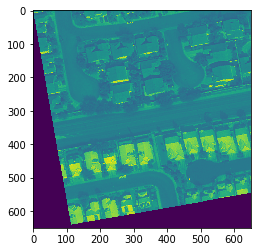

In [52]:
pyplot.imshow(dest)

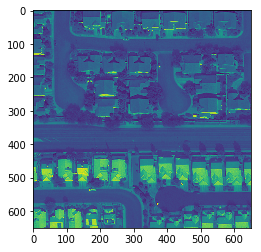

In [45]:
pyplot.imshow(band1)

In [47]:
dst_transform = dataset.transform * A.rotation(90)

In [48]:
dst_transform

Affine(0.0, -2.7000000000043656e-06, -115.2724176,
       -2.700000153853265e-06, -0.0, 36.1897226999)

In [49]:
dataset.transform

Affine(2.7000000000043656e-06, 0.0, -115.2724176,
       0.0, -2.700000153853265e-06, 36.1897226999)

In [50]:
dataset.width

650